In [ ]:
from google.colab import files
uploaded = files.upload()



Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv


In [ ]:
#load the data set
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from semopy import Model, Optimizer

In [ ]:
#data cleaning
# Convert 'TotalCharges' to numeric (empty strings will become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop customerID
df = df.drop('customerID', axis=1)

# Drop rows with missing values
df=df.dropna()

# Handle categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in categorical_cols:
        categorical_cols.remove('Churn')

# Convert categorical variables to numeric using One-Hot Encoding (better than LabelEncoder for many algorithms)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Convert target variable to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now the data is ready for analysis
print("Data preparation complete. Shape:", X_scaled.shape)


Data preparation complete. Shape: (7032, 30)


1.PCA


Explained variance ratio: [3.31601383e-01 1.20090615e-01 9.01453604e-02 4.75499305e-02
 4.14301148e-02 4.12062738e-02 3.81528947e-02 3.33678430e-02
 3.12304397e-02 2.95429845e-02 2.65961293e-02 2.37964294e-02
 2.24944460e-02 2.05590830e-02 2.02482905e-02 1.74856860e-02
 1.55526514e-02 1.52541395e-02 1.46713170e-02 9.23412008e-03
 7.84361734e-03 1.91635429e-03 2.98961869e-05 5.74959014e-18
 2.90904591e-18 1.25053625e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Number of components: 30
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.61      0.42      0.50       374

    accuracy                           0.77      1407
   macro avg       0.71      0.66      0.67      1407
weighted avg       0.76      0.77      0.76      1407



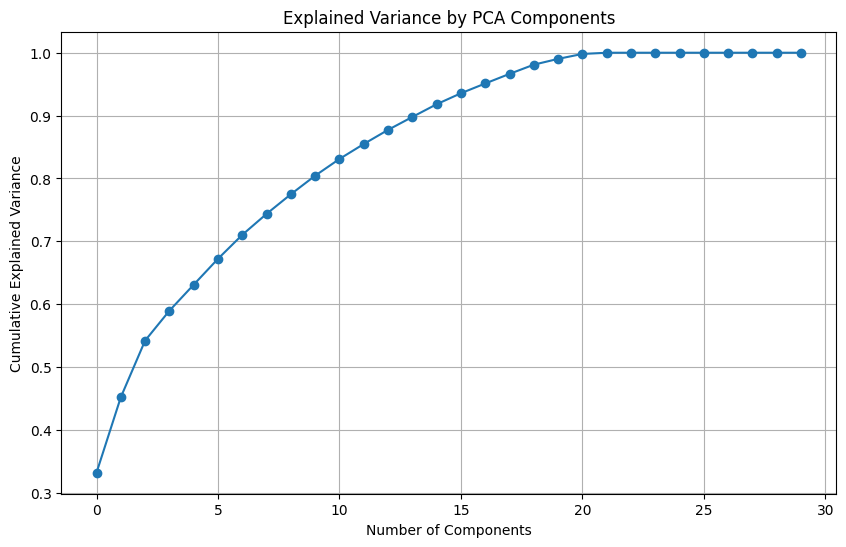

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Print results
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


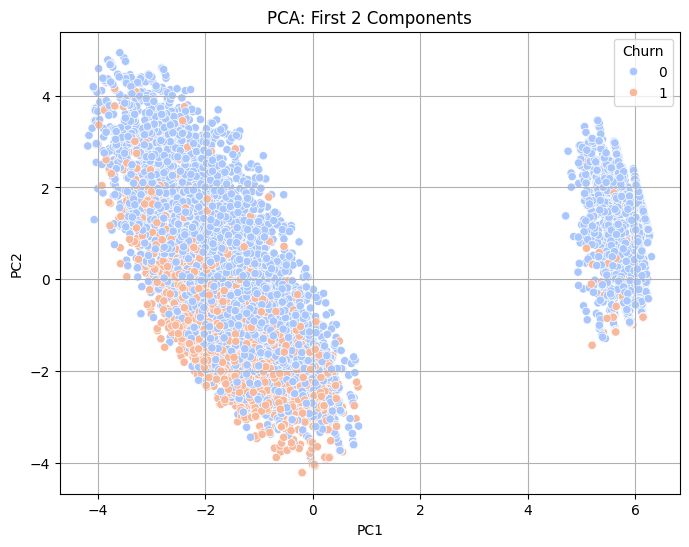

In [ ]:

# Extract the first two components for plotting
X_pca_2d = X_pca[:, :2]
# Plot the first two components with color based on 'Churn'
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=df['Churn'], palette='coolwarm')
plt.title('PCA: First 2 Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



3. Factor Analysis


In [ ]:
!pip install factor_analyzer


Factor Loadings:
                                        Factor1   Factor2       Factor3  \
SeniorCitizen                         -0.179473 -0.052258 -1.460298e-01   
tenure                                -0.036492 -0.016976 -3.769265e-01   
MonthlyCharges                        -0.736249 -0.434206 -5.124966e-01   
TotalCharges                          -0.362233 -0.204342 -5.357360e-01   
gender_Male                            0.004179  0.008750  1.216333e-02   
Partner_Yes                            0.000946 -0.018703 -1.579187e-01   
Dependents_Yes                         0.136426  0.034269  1.285868e-02   
PhoneService_Yes                       0.236182 -0.971709  9.964386e-11   
MultipleLines_No phone service        -0.236182  0.971709 -9.964386e-11   
MultipleLines_Yes                     -0.189276 -0.333673 -3.800995e-01   
InternetService_Fiber optic           -0.440035 -0.405586 -6.284319e-01   
InternetService_No                     0.997839  0.065714 -5.750058e-11   
OnlineS

/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Test: 0.280 (should be > 0.6)
Bartlett’s Test: p-value = 0.00000 (should be < 0.05)

Top features for each factor:

Factor1:
InternetService_No                      0.997839
OnlineSecurity_No internet service      0.997839
TechSupport_No internet service         0.997839
StreamingTV_No internet service         0.997839
DeviceProtection_No internet service    0.997839
Name: Factor1, dtype: float64

Factor2:
MultipleLines_No phone service    0.971709
PhoneService_Yes                  0.971709
MonthlyCharges                    0.434206
InternetService_Fiber optic       0.405586
MultipleLines_Yes                 0.333673
Name: Factor2, dtype: float64

Factor3:
InternetService_Fiber optic    0.628432
TotalCharges                   0.535736
MonthlyCharges                 0.512497
StreamingTV_Yes                0.506338
StreamingMovies_Yes            0.504392
Name: Factor3, dtype: float64

Factor4:
tenure                         0.686322
TotalCharges                   0.573607
Contract_Tw

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:166: RuntimeWarning: divide by zero encountered in divide
  smc = 1 - 1 / np.diag(corr_inv)


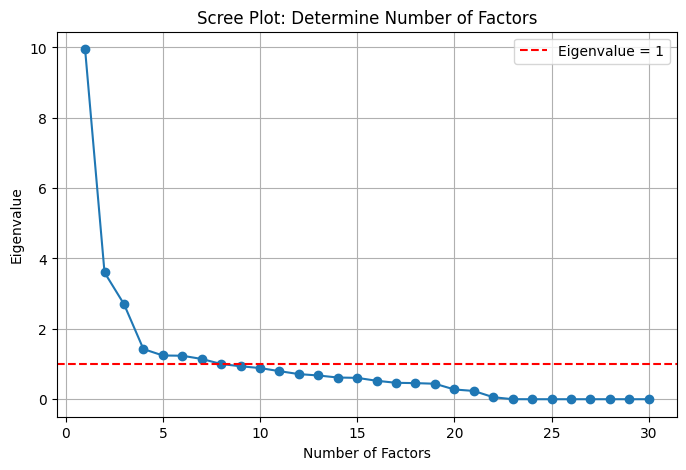

In [ ]:

# Perform Factor Analysis
n_factors = 5
fa = FactorAnalysis(n_components=n_factors, random_state=42)
X_fa = fa.fit_transform(X_scaled)

# Print factor loadings
fa_loadings = pd.DataFrame(fa.components_.T,
                          columns=[f'Factor{i}' for i in range(1, n_factors + 1)],
                          index=X.columns)

print("\nFactor Loadings:")
print(fa_loadings)



# KMO Test
kmo_all, kmo_model = calculate_kmo(X_scaled)
print(f"KMO Test: {kmo_model:.3f} (should be > 0.6)")

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print(f"Bartlett’s Test: p-value = {p_value:.5f} (should be < 0.05)")


# Print the most important features for each factor
print("\nTop features for each factor:")
for i in range(n_factors):
    print(f"\nFactor{i+1}:")
    print(fa_loadings[f'Factor{i+1}'].abs().sort_values(ascending=False).head(5))

# Run FactorAnalyzer
fa = FactorAnalyzer(n_factors=X.shape[1], rotation=None)
fa.fit(X_scaled)

# Get eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Plot scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.title('Scree Plot: Determine Number of Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.legend()
plt.show()

4. Canonical Correlation Analysis (CCA)


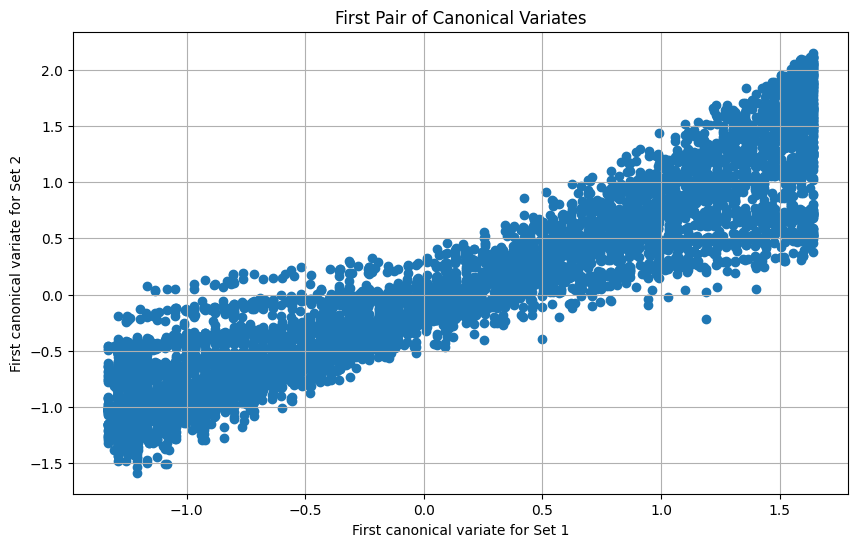

Canonical correlation 1: 0.931
Canonical correlation 2: 0.356
Canonical correlation 3: 0.078
Canonical correlation 4: 0.050
Canonical correlation 5: 0.031


In [ ]:
# Split features into two sets for CCA
# Set 1: Demographic features
set1_cols = ['gender_Male', 'SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'tenure']
X1 = X[set1_cols]

# Set 2: Service features
set2_cols = [col for col in X.columns if col not in set1_cols]
X2 = X[set2_cols]

# Standardize both sets
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

# Perform CCA
cca = CCA(n_components=min(X1_scaled.shape[1], X2_scaled.shape[1]))
cca.fit(X1_scaled, X2_scaled)

# Transform the data
X1_c, X2_c = cca.transform(X1_scaled, X2_scaled)
# Split features into two sets for CCA
# Set 1: Demographic features
set1_cols = ['gender_Male', 'SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'tenure']
X1 = X[set1_cols]

# Set 2: Service features
set2_cols = [col for col in X.columns if col not in set1_cols]
X2 = X[set2_cols]

# Standardize both sets
X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

# Perform CCA
cca = CCA(n_components=min(X1_scaled.shape[1], X2_scaled.shape[1]))
cca.fit(X1_scaled, X2_scaled)

# Transform the data
X1_c, X2_c = cca.transform(X1_scaled, X2_scaled)

# Calculate canonical correlations
correlations = [np.corrcoef(X1_c[:, i], X2_c[:, i])[0, 1] for i in range(X1_c.shape[1])]

# Plot canonical variates
plt.figure(figsize=(10, 6))
plt.scatter(X1_c[:, 0], X2_c[:, 0])
plt.xlabel('First canonical variate for Set 1')
plt.ylabel('First canonical variate for Set 2')
plt.title('First Pair of Canonical Variates')
plt.grid()
plt.show()
for i, corr in enumerate(correlations):
    print(f"Canonical correlation {i+1}: {corr:.3f}")



2.Discriminant Analysis


Explained variance ratio: [1.]


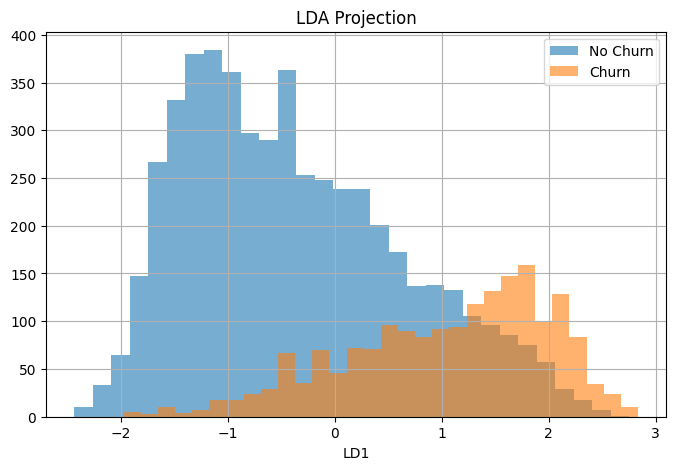

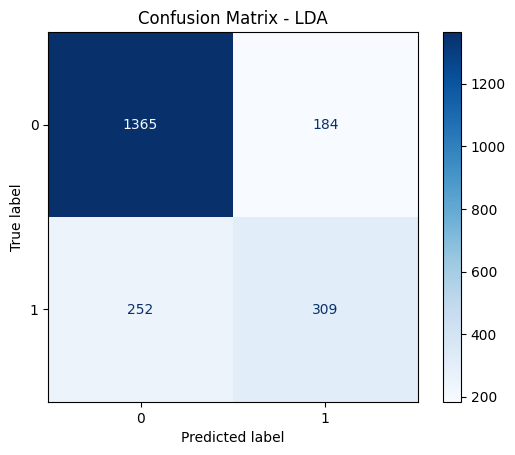

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1549
         Yes       0.63      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110

Accuracy: 0.793


In [ ]:
# Encode the target
le = LabelEncoder()
y = le.fit_transform(df['Churn'])  # 0 = No, 1 = Yes

# Assume X is your feature matrix (already preprocessed and scaled)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Explained variance ratio
print("Explained variance ratio:", lda.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.hist(X_lda[y == 0], alpha=0.6, label='No Churn', bins=30)
plt.hist(X_lda[y == 1], alpha=0.6, label='Churn', bins=30)
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.legend()
plt.grid()
plt.show()

#accuracy

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LDA")
plt.show()
# Classification Metrics
print("Classification Report:")

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")


